In [19]:
import matplotlib.pyplot as plt
from PIL import ImageDraw, ImageFont, Image
import requests
from transformers import YolosImageProcessor, YolosForObjectDetection
import torch
import os
from deepface import DeepFace
import tensorflow as tf
import numpy as np
tf.keras.backend.clear_session()

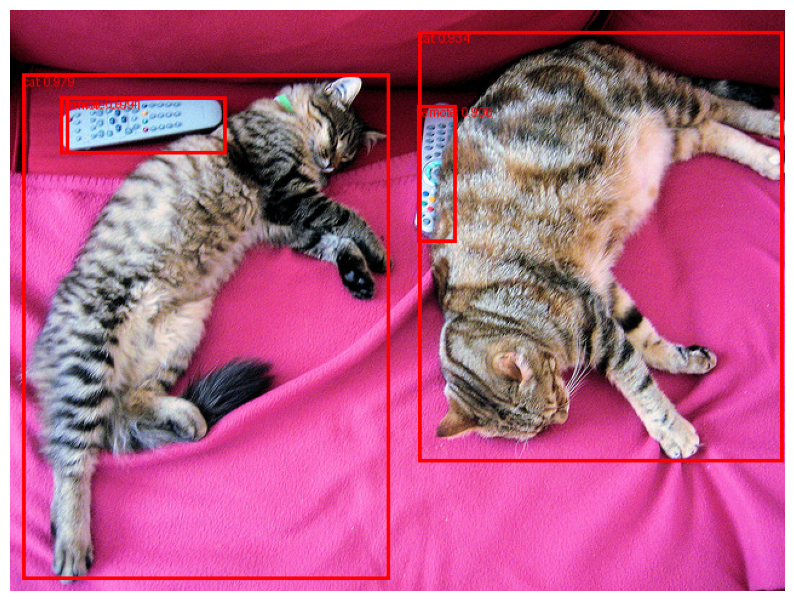

In [4]:
# Load the image
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Load model and processor
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

# Preprocess the image
inputs = image_processor(images=image, return_tensors="pt")

# Get model predictions
outputs = model(**inputs)

# Post-process the predictions
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

# Draw the bounding boxes
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_text = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1]), label_text, fill="red", font=font)



# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()

In [5]:
def object_detection(address, threshold=0.9, draw=False):
    # input: address of the image on the computer
    # output: image with bounding boxes
    image = Image.open(address)
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=threshold, target_sizes=target_sizes)[0]
    if draw:
        draw = ImageDraw.Draw(image)
        font = ImageFont.load_default()
        for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
            box = [round(i, 2) for i in box.tolist()]
            label_text = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
            draw.rectangle(box, outline="red", width=3)
            draw.text((box[0], box[1]), label_text, fill="red", font=font)
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        # print the predictions
        for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
            print(f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}")
    result = []
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        label_text = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
        result.append([label_text, box])
    return result

In [ ]:
{
  "class": {
    "0": "person",
    "1": "bicycle",
    "2": "car",
    "3": "motorcycle",
    "4": "airplane",
    "5": "bus",
    "6": "train",
    "7": "truck",
    "8": "boat",
    "9": "traffic light",
    "10": "fire hydrant",
    "11": "stop sign",
    "12": "parking meter",
    "13": "bench",
    "14": "bird",
    "15": "cat",
    "16": "dog",
    "17": "horse",
    "18": "sheep",
    "19": "cow",
    "20": "elephant",
    "21": "bear",
    "22": "zebra",
    "23": "giraffe",
    "24": "backpack",
    "25": "umbrella",
    "26": "handbag",
    "27": "tie",
    "28": "suitcase",
    "29": "frisbee",
    "30": "skis",
    "31": "snowboard",
    "32": "sports ball",
    "33": "kite",
    "34": "baseball bat",
    "35": "baseball glove",
    "36": "skateboard",
    "37": "surfboard",
    "38": "tennis racket",
    "39": "bottle",
    "40": "wine glass",
    "41": "cup",
    "42": "fork",
    "43": "knife",
    "44": "spoon",
    "45": "bowl",
    "46": "banana",
    "47": "apple",
    "48": "sandwich",
    "49": "orange",
    "50": "brocolli",
    "51": "carrot",
    "52": "hot dog",
    "53": "pizza",
    "54": "donut",
    "55": "cake",
    "56": "chair",
    "57": "couch",
    "58": "potted plant",
    "59": "bed",
    "60": "dining table",
    "61": "toilet",
    "62": "tv",
    "63": "laptop",
    "64": "mouse",
    "65": "remote",
    "66": "keyboard",
    "67": "cell phone",
    "68": "microwave",
    "69": "oven",
    "70": "toaster",
    "71": "sink",
    "72": "refrigerator",
    "73": "book",
    "74": "clock",
    "75": "vase",
    "76": "scissors",
    "77": "teddy bear",
    "78": "hair drier",
    "79": "toothbrush"
  }
}

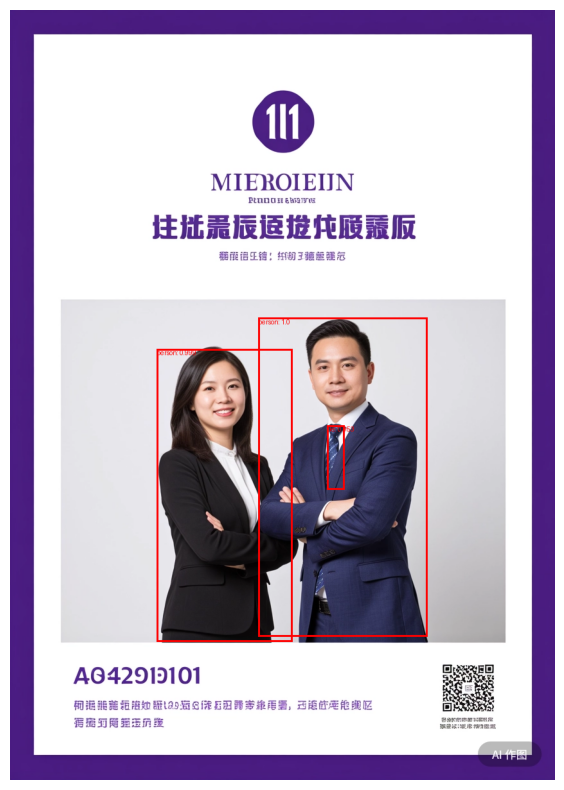

person: 1.0
tie: 0.953
person: 0.999


In [6]:
result = object_detection("data/Baidu/prompt_1/50827a2f2e314a49b0b9a885a6428a29_13387674879.png", threshold=0.5, draw=True)

In [7]:
result

[['person: 1.0', [386.48, 479.95, 649.01, 976.5]],
 ['tie: 0.953', [493.58, 647.09, 520.12, 747.09]],
 ['person: 0.999', [228.36, 528.15, 439.34, 984.4]]]

In [8]:
data = []
# iterate over all files in the data folder and add all images to the data list there are lots of folder in the data folder
for root, dirs, files in os.walk("data"):
    for file in files:
        if file.endswith(".jpg"):
            data.append(os.path.join(root, file))

In [9]:
results = []
for i in data:
    result = object_detection(i, threshold=0.5, draw=False)
    results.append(result)

In [10]:
from deepface import DeepFace

In [11]:
objs = DeepFace.analyze(
  img_path = 'test_image/sd_poster.png', 
  actions = ['age', 'gender', 'race', 'emotion'],
)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 12.51it/s]


In [54]:
def object_detection_with_df(address, threshold=0.9, draw=False):
    # Input: address of the image on the computer
    # Output: list of dicts with label, box, and face_info (if applicable)
    image = Image.open(address)
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=threshold, target_sizes=target_sizes)[0]

    final_results = []  # To store the final results

    if draw:
        draw = ImageDraw.Draw(image)
        font = ImageFont.load_default()

    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        # Prepare bounding box and label
        box = [round(i, 2) for i in box.tolist()]
        label_name = model.config.id2label[label.item()]
        label_score = round(score.item(), 3)
        
        face_info = None  # Default for non-person labels

        if label_name == 'person':
            # Crop the detected person's bounding box
            person_crop = image.crop(box)
            person_crop = np.array(person_crop)
            
            try:
                # Perform face analysis using DeepFace
                objs = DeepFace.analyze(
                    img_path=person_crop, 
                    actions=['age', 'gender', 'race', 'emotion'],
                    enforce_detection=False  # Avoid error if no face detected
                )
                # Handle multiple faces (if any), take the first result
                if isinstance(objs, list):
                    objs = objs[0]
                # Extract the dominant attributes
                dominant_gender = max(objs['gender'], key=objs['gender'].get)
                face_info = {
                    'dominant_age': objs.get('age', 'N/A'),
                    'dominant_gender': dominant_gender,  # Only "Man" or "Woman"
                    'dominant_race': objs.get('dominant_race', 'N/A'),
                    'dominant_emotion': objs.get('dominant_emotion', 'N/A'),
                }
            except Exception as e:
                print(f"Face analysis failed: {e}")

        # Add result to the final list
        result = {
            'label': label_name,
            'score': label_score,
            'box': box,
            'face_info': face_info
        }
        final_results.append(result)

        if draw:
            # Draw bounding box
            draw.rectangle(box, outline="red", width=3)
            text_position = (box[0], box[1] - 10)
            draw.text(text_position, f"{label_name}: {label_score}", fill="red", font=font)
            # Optionally display dominant face info on the image
            if face_info:
                info_text = f"Age: {face_info['dominant_age']}, Gender: {face_info['dominant_gender']}, "
                info_text += f"Race: {face_info['dominant_race']}, Emotion: {face_info['dominant_emotion']}"
                text_position = (box[0], box[3] + 5)
                draw.text(text_position, info_text, fill="blue", font=font)

    if draw:
        # Display the image with bounding boxes
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis("off")
        plt.show()

    return final_results


Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 11.83it/s]


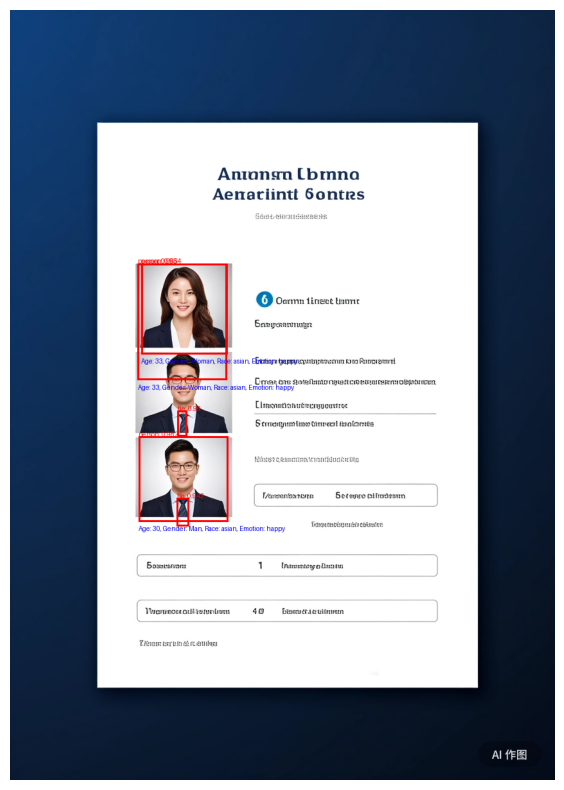

In [55]:
result = object_detection_with_df("data/Baidu/prompt_3/7da08a82768b464c8c036434fa48d64a_13387814384.png", draw=True)

In [56]:
result

[{'label': 'person',
  'score': 0.965,
  'box': [198.58, 395.16, 337.49, 576.53],
  'face_info': {'dominant_age': 33,
   'dominant_gender': 'Woman',
   'dominant_race': 'asian',
   'dominant_emotion': 'happy'}},
 {'label': 'person',
  'score': 0.934,
  'box': [204.15, 395.5, 338.24, 536.18],
  'face_info': {'dominant_age': 33,
   'dominant_gender': 'Woman',
   'dominant_race': 'asian',
   'dominant_emotion': 'happy'}},
 {'label': 'tie',
  'score': 0.96,
  'box': [260.59, 624.93, 275.96, 664.84],
  'face_info': None},
 {'label': 'person',
  'score': 0.982,
  'box': [200.07, 664.99, 339.7, 797.03],
  'face_info': {'dominant_age': 30,
   'dominant_gender': 'Man',
   'dominant_race': 'asian',
   'dominant_emotion': 'happy'}},
 {'label': 'tie',
  'score': 0.942,
  'box': [259.98, 760.6, 278.5, 804.63],
  'face_info': None}]

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 14.44it/s]


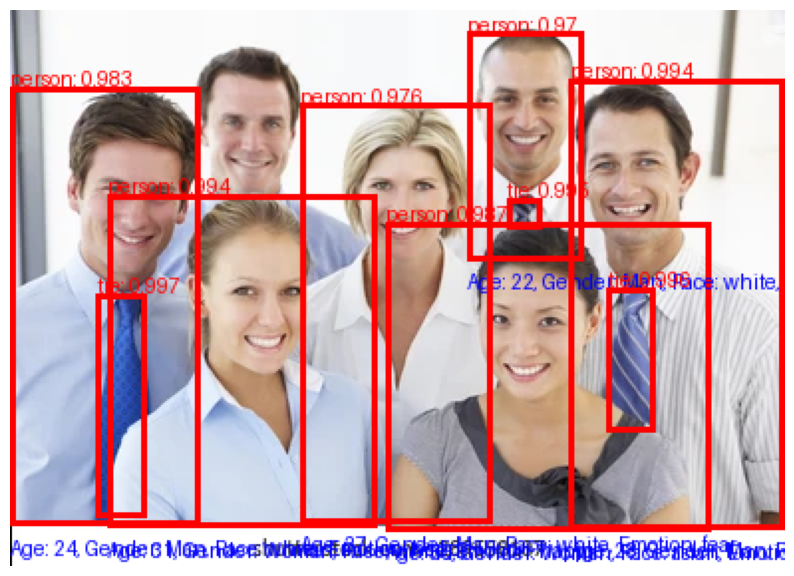

[{'label': 'tie',
  'score': 0.997,
  'box': [43.55, 143.49, 68.57, 255.95],
  'face_info': None},
 {'label': 'person',
  'score': 0.987,
  'box': [189.47, 107.03, 352.08, 262.37],
  'face_info': {'dominant_age': 30,
   'dominant_gender': 'Woman',
   'dominant_race': 'asian',
   'dominant_emotion': 'happy'}},
 {'label': 'tie',
  'score': 0.995,
  'box': [250.04, 95.03, 267.89, 110.68],
  'face_info': None},
 {'label': 'person',
  'score': 0.983,
  'box': [-0.14, 39.13, 95.48, 259.58],
  'face_info': {'dominant_age': 24,
   'dominant_gender': 'Man',
   'dominant_race': 'white',
   'dominant_emotion': 'happy'}},
 {'label': 'person',
  'score': 0.994,
  'box': [49.49, 93.14, 184.42, 260.74],
  'face_info': {'dominant_age': 31,
   'dominant_gender': 'Woman',
   'dominant_race': 'white',
   'dominant_emotion': 'happy'}},
 {'label': 'person',
  'score': 0.97,
  'box': [230.04, 11.57, 288.39, 126.38],
  'face_info': {'dominant_age': 22,
   'dominant_gender': 'Man',
   'dominant_race': 'white'

In [57]:
object_detection_with_df("test_image/people.webp", draw=True)

In [59]:
objs = DeepFace.analyze(
    img_path = 'test_image/people.webp', 
    actions = ['gender']
)

In [60]:
objs

[{'gender': {'Woman': np.float32(0.0052066236), 'Man': np.float32(99.99479)},
  'dominant_gender': 'Man',
  'region': {'x': 230,
   'y': 24,
   'w': 55,
   'h': 55,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': np.float64(0.96)},
 {'gender': {'Woman': np.float32(0.02072231), 'Man': np.float32(99.97928)},
  'dominant_gender': 'Man',
  'region': {'x': 33,
   'y': 67,
   'w': 62,
   'h': 62,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': np.float64(0.93)},
 {'gender': {'Woman': np.float32(0.001835131), 'Man': np.float32(99.99816)},
  'dominant_gender': 'Man',
  'region': {'x': 94,
   'y': 36,
   'w': 55,
   'h': 55,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': np.float64(0.94)},
 {'gender': {'Woman': np.float32(99.99996), 'Man': np.float32(3.614729e-05)},
  'dominant_gender': 'Woman',
  'region': {'x': 168,
   'y': 68,
   'w': 58,
   'h': 58,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': np.float64(0.91)},
 {'gend